<span style="font-size:24px;">Import required packages and functions</span>  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import plot_tree

<span style="font-size:24px;">import data set and do a first quick check

In [7]:

dataset = pd.read_csv("survey_results_public.csv") 

# select a subset of features to make it somewhat easier to analyze
df = dataset[["Age", "EdLevel", "ConvertedCompYearly" ]]

# print head data to do a quick check what is still in there.
print(df.head(20))

# check types of data and check for NaNs.
print(df.dtypes)
print(df.isna().sum())

# clean data with NaNs
df = df.dropna()
print(df.head(20))

                   Age                                            EdLevel  \
0      18-24 years old                                                NaN   
1      25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2      45-54 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3      25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4      25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5      35-44 years old  Some college/university study without earning ...   
6      35-44 years old  Some college/university study without earning ...   
7      25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
8      45-54 years old    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
9      25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
10     25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11     25-34 years old       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

<span style="font-size:24px;">Analyze data with visual plots

C:\Users\reindj\AppData\Local\Temp\ipykernel_17508\2153074779.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='ConvertedCompYearly', data=df, palette='coolwarm')
C:\Users\reindj\AppData\Local\Temp\ipykernel_17508\2153074779.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=df, palette='coolwarm')


(0.0, 1000000.0)

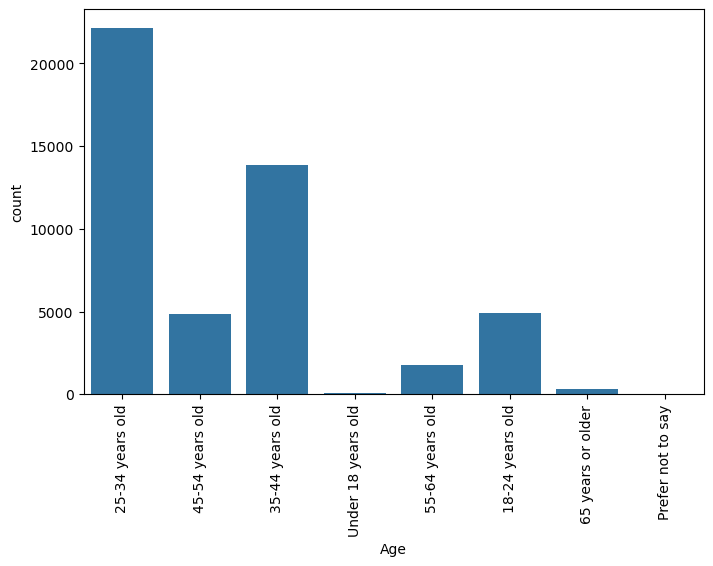

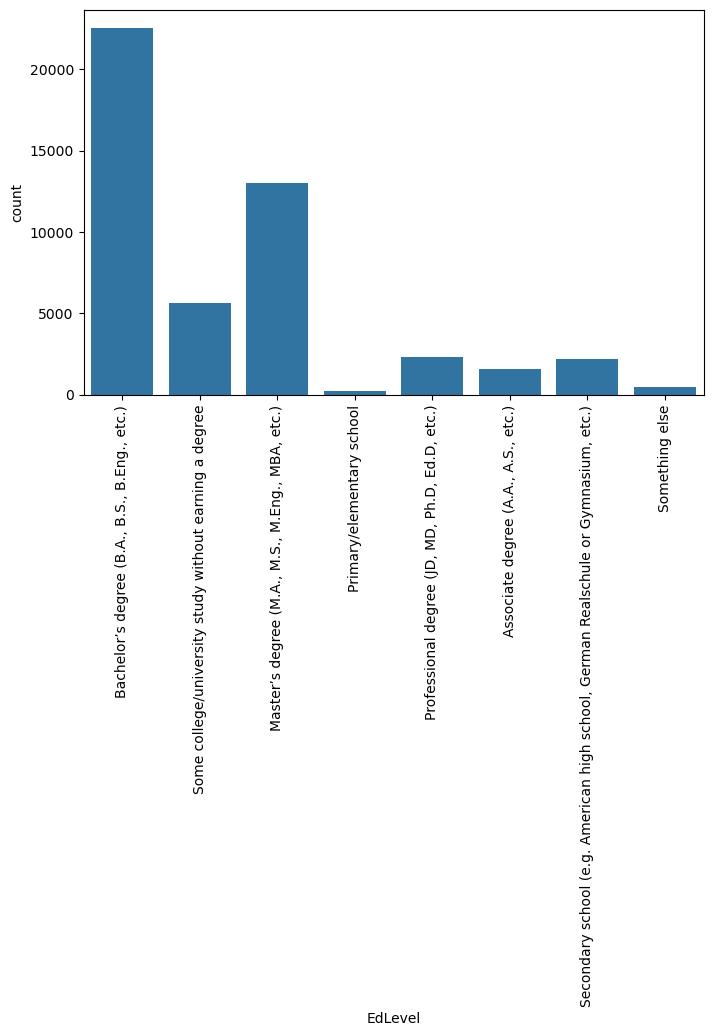

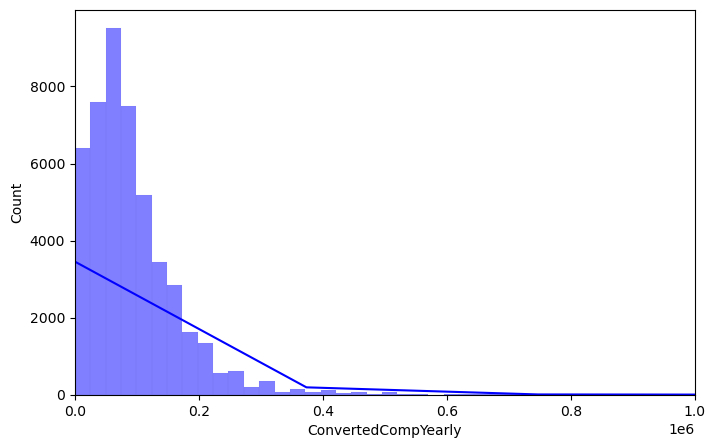

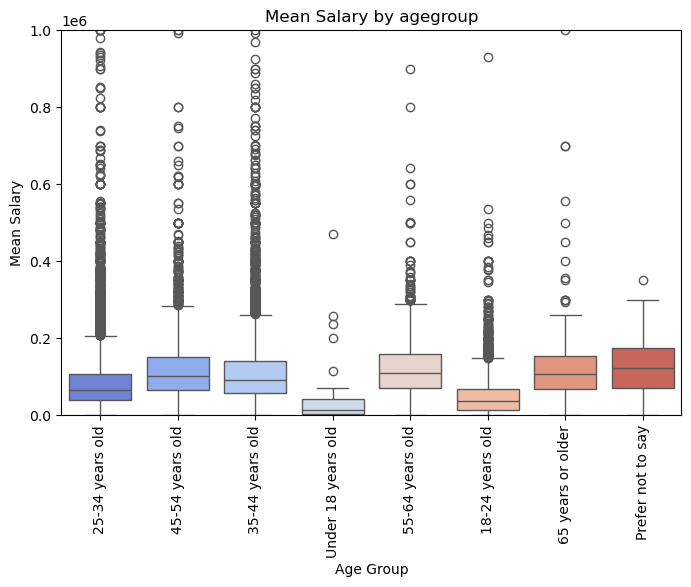

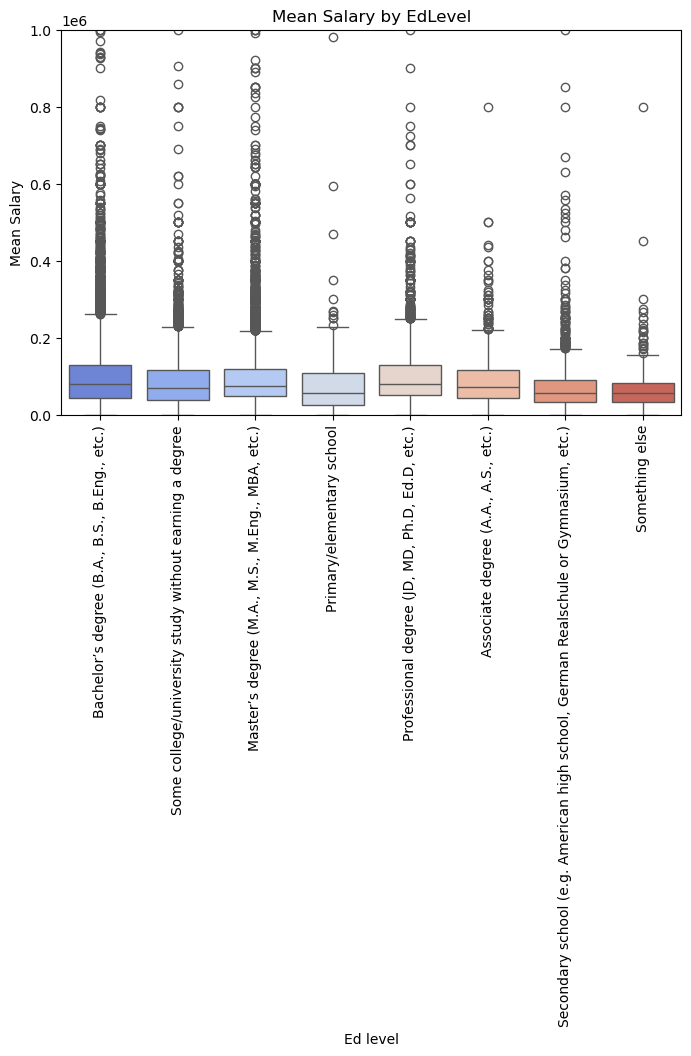

In [3]:
# Analyze data, how much are differrent ages and edlevels in there? and how is the group divided?
plt.figure(figsize=(8,5))
y_age = sns.countplot(x="Age", data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(8,5))
y_age = sns.countplot(x="EdLevel", data=df)
plt.xticks(rotation=90)

# How is the salary divided in general?
plt.figure(figsize=(8, 5))
sns.histplot(df.ConvertedCompYearly, bins=3000, kde=True, color="blue") 
plt.xlim(0, 1000000)

# Plot mean salary by age group. Clearly some outliers in salary are present.
plt.figure(figsize=(8,5))
sns.boxplot(x='Age', y='ConvertedCompYearly', data=df, palette='coolwarm')

plt.xlabel("Age Group")
plt.ylabel("Mean Salary")
plt.title("Mean Salary by agegroup")
plt.xticks(rotation=90)
plt.ylim(0, 1000000)

# Plot mean salary by EdLevel group in a boxplot. Clearly some outliers in salary are present.
plt.figure(figsize=(8,5))
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=df, palette='coolwarm')

plt.xlabel("Ed level")
plt.ylabel("Mean Salary")
plt.title("Mean Salary by EdLevel")
plt.xticks(rotation=90)
plt.ylim(0, 1000000)

<span style="font-size:24px;"> Further cleaning/prepare of data for training

In [8]:
# Drop edlevel, to simplify the model
df = df[["Age", "ConvertedCompYearly" ]]

# remove outliers using the z-score
salaries = df[["ConvertedCompYearly"]]
z_scores = np.abs((salaries - salaries.mean()) / salaries.std())
# Set a threshold for outliers
threshold = 3
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

# change to numeric data which can be used and print types
df = pd.get_dummies(df)

# split data in inputs and outputs
y = df['ConvertedCompYearly']
X = df.drop('ConvertedCompYearly', axis=1)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=654)

<span style="font-size:24px;">Initialize and make model

In [5]:
# Make and train the randomforestregressor with n_estimators number of trees. (we use 1 tree, so not really a forest)
model = RandomForestClassifier(n_estimators = 1, max_depth = 25, random_state=654)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_predTrain = model.predict(X_train)


<span style="font-size:24px;"> Evaluate performance

Root Mean Squared Error Test: 102430.08
Root Mean Squared Error Train: 93271.54


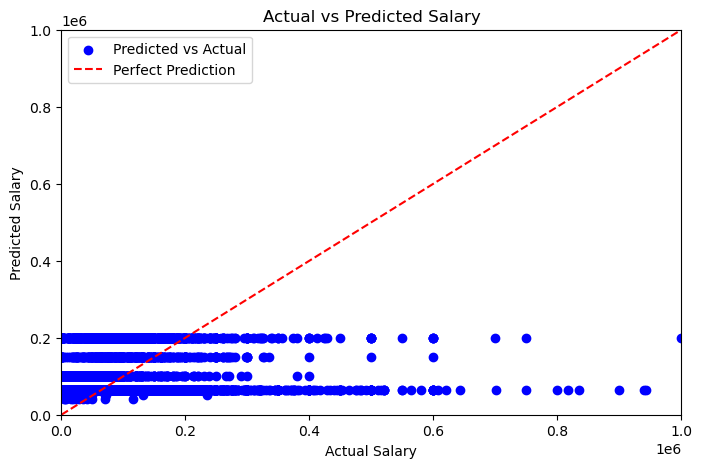

In [9]:
# Evaluate the models RMSE
rmse = root_mean_squared_error(y_test, y_pred)
rmseTrain = root_mean_squared_error(y_train, y_predTrain)
print(f"Root Mean Squared Error Test: {rmse:.2f}")
print(f"Root Mean Squared Error Train: {rmseTrain:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction")
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()


<span style="font-size:24px;"> Concluding notes </span>

Conclusion is that the model is very bad at predicting salary, it has a RMSE of 102.000 (suppose dollars), so that is a very bad predicting capability.
Likely part is due to the data, which seems quite bad with to few inputs to predict the output, it is hard to distinguish the salary based on age group alone.